In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import VAR # 이 부분이 중요합니다.

In [2]:
import matplotlib as mpl

# 1) 폰트 로드 (윈도우 예시)
mpl.font_manager.fontManager.addfont(r"C:\Windows\Fonts\malgun.ttf")
plt.rc('font', family='Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

# 3) seaborn 기본 스타일에 폰트 적용
sns.set(font='Malgun Gothic', style='whitegrid')


In [3]:
dataset = pd.read_excel("dataset2.xlsx", index_col=0)

df_diff1 = pd.read_excel("df_diff1.xlsx", index_col=0)
df_diff1

,경제성장률(전기대비),소비자물가총지수,매출액,수출,내수,연구개발비,소비자심리지수,실업률,가동률지수,환율,기준금리,ROE
분기,,,,,,,,,,,,
2010-Q2,5.3,0.006376,0.026607,0.046310,4.051848e+09,0.036034,1.330279e+06,-1.727682,8.734193,0.077285,-0.100791,0.144959
2010-Q3,4.7,0.007674,0.025917,0.044260,4.070968e+09,0.034781,1.202304e+06,0.669740,-7.147284,-0.069449,-0.010370,-0.082396
2010-Q4,5.1,0.004968,0.025262,0.042383,4.090088e+09,0.033612,1.261627e+06,-0.326992,10.201434,-0.004747,-0.106948,-0.028674
2011-Q1,4.7,0.018651,0.024640,0.040660,4.109208e+09,0.032519,7.949268e+05,0.250791,-6.255393,-0.034151,0.132769,0.062915
2011-Q2,4.1,0.007751,0.163840,0.176029,4.112749e+09,0.225035,8.888495e+05,-0.832331,7.528215,-0.026799,-0.031026,0.069889
2011-Q3,4.2,0.010880,-0.083261,0.149632,4.116289e+09,0.230904,7.543635e+05,-0.070651,-7.768618,0.098396,-0.020966,-0.215450
2011-Q4,4.4,0.001590,0.200461,0.130129,4.119830e+09,0.212965,7.846486e+05,-0.163070,10.048843,-0.023272,-0.050748,-0.038392
2012-Q1,4.7,0.009456,-0.122664,-0.151879,3.856838e+09,-0.459510,8.805144e+05,0.163070,-5.609436,-0.015762,0.010799,0.180640
2012-Q2,4.1,0.002075,0.060829,0.030299,4.324638e+09,0.142841,8.450169e+05,-0.232191,1.969684,0.010536,-0.016222,0.004795


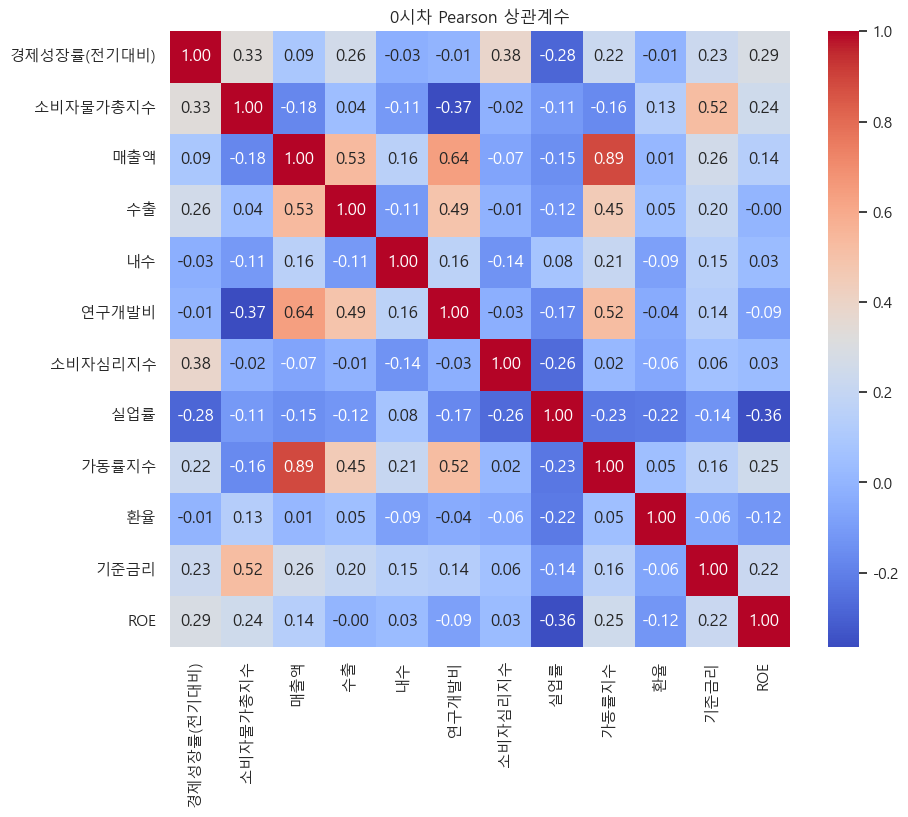

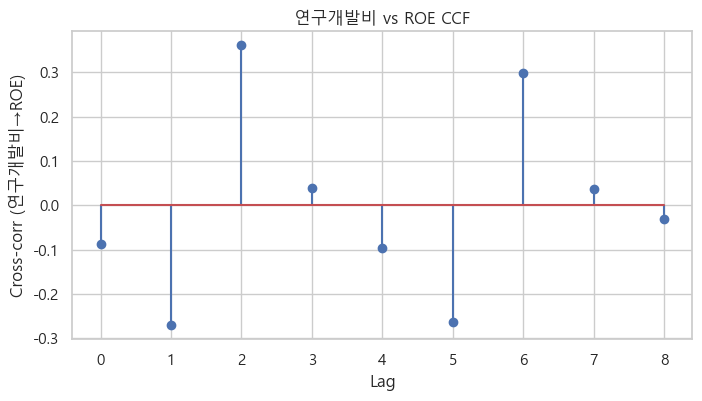

모든 변수 쌍의 최대 절대 Cross‐Correlation (lags=-4..4)
            경제성장률(전기대비) 소비자물가총지수    매출액     수출     내수  연구개발비 소비자심리지수    실업률  \
경제성장률(전기대비)         NaN    0.331 -0.178  0.256 -0.152   0.09   0.461 -0.333   
소비자물가총지수          0.331      NaN  0.429  0.322   0.17 -0.462   0.154 -0.359   
매출액              -0.178    0.429    NaN  0.531 -0.237 -0.751   0.173 -0.263   
수출                0.256    0.322  0.531    NaN  0.239  0.489    0.18 -0.272   
내수               -0.152     0.17 -0.237  0.239    NaN -0.208  -0.271  0.115   
연구개발비              0.09   -0.462 -0.751  0.489 -0.208    NaN   0.112 -0.209   
소비자심리지수           0.461    0.154  0.173   0.18 -0.271  0.112     NaN -0.264   
실업률              -0.333   -0.359 -0.263 -0.272  0.115 -0.209  -0.264    NaN   
가동률지수             0.223    0.438  0.886  0.454 -0.246 -0.724    0.17  0.295   
환율               -0.136    0.134 -0.208  0.097  0.175  0.238  -0.197 -0.221   
기준금리              0.254    0.523  0.256 -0.209  0.152 -0.237   -0.21 -0.281   
ROE   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import ccf

# 2. 0시차 Pearson 상관계수 히트맵
corr0 = df_diff1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr0, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("0시차 Pearson 상관계수")
plt.show()

# 3. 특정 변수 쌍의 Cross-Correlation Function (CCF) 그리기
var_x = "연구개발비"   # 선행 변수 후보
var_y = "ROE"        # 후행 변수 후보
max_lag = 8          # 확인할 최대 lag

# statsmodels의 ccf는 lag ≥ 0만 반환하므로, 양(0~max_lag) 시차만 먼저 확인
ccf_vals = ccf(df_diff1[var_x], df_diff1[var_y], adjusted=True)[:max_lag+1]
lags = np.arange(0, max_lag+1)

plt.figure(figsize=(8,4))
plt.stem(lags, ccf_vals)
plt.xlabel("Lag")
plt.ylabel(f"Cross-corr ({var_x}→{var_y})")
plt.title(f"{var_x} vs {var_y} CCF")
plt.show()

# 4. 모든 변수 쌍에 대해 lag 범위 내 최대 절대 cross‐correlation 요약
max_lag = 4
lags = range(-max_lag, max_lag+1)
summary = pd.DataFrame(index=df_diff1.columns, columns=df_diff1.columns)

for i in df_diff1.columns:
    for j in df_diff1.columns:
        if i == j:
            summary.loc[i, j] = np.nan
        else:
            vals = [df_diff1[i].corr(df_diff1[j].shift(lag)) for lag in lags]
            summary.loc[i, j] = round(max(vals, key=abs), 3)

print("모든 변수 쌍의 최대 절대 Cross‐Correlation (lags=-4..4)")
print(summary)


In [5]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 2. VIF 계산을 위해 상수항(constant) 추가
X = add_constant(df_diff1)

# 3. 각 변수(feature)의 VIF 계산
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i)
            for i in range(X.shape[1])]
})

print(vif_data)


        feature        VIF
0         const  71.177028
1   경제성장률(전기대비)   1.702976
2      소비자물가총지수   2.434236
3           매출액   7.446458
4            수출   1.819323
5            내수   1.268970
6         연구개발비   2.452715
7       소비자심리지수   1.404398
8           실업률   1.519715
9         가동률지수   6.345178
10           환율   1.224311
11         기준금리   2.035010
12          ROE   1.533499


In [6]:
df_diff1 = df_diff1.drop(columns=['가동률지수'])


In [7]:
# 2. VIF 계산을 위해 상수항(constant) 추가
X = add_constant(df_diff1)

# 3. 각 변수(feature)의 VIF 계산
vif_data = pd.DataFrame({
    "feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i)
            for i in range(X.shape[1])]
})

print(vif_data)

        feature        VIF
0         const  61.676140
1   경제성장률(전기대비)   1.603784
2      소비자물가총지수   2.429396
3           매출액   2.214556
4            수출   1.819261
5            내수   1.202511
6         연구개발비   2.424016
7       소비자심리지수   1.396677
8           실업률   1.505203
9            환율   1.212597
10         기준금리   1.937237
11          ROE   1.474240


In [8]:
# BY 그래인저 상관관계
df_diff1 = df_diff1.drop(columns=['소비자물가총지수','내수','환율','기준금리'])
df_diff1.columns

Index(['경제성장률(전기대비)', '매출액', '수출', '연구개발비', '소비자심리지수', '실업률', 'ROE'], dtype='object')

In [9]:
df_diff1 = df_diff1.reset_index()          # '연도'라는 새 칼럼이 생깁니다😊
df_diff1 = df_diff1.set_index('분기')                 # 연도를 인덱스로
df_diff1.index = pd.PeriodIndex(
    df_diff1.index.astype(str), freq='Q'            # 연 단위 주기 설정😊
)

In [10]:
from statsmodels.tsa.api import VAR

# df: (T × k) 형태의 시계열 DataFrame
model = VAR(df_diff1)  
# 최대 10차수까지 정보기준 계산
lag_order_results = model.select_order(maxlags=2)  

print(lag_order_results.summary())


 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       9.542      9.793*   1.394e+04       9.640
1       8.230       10.24       3802.       9.010
2      7.001*       10.76      1199.*      8.463*
-------------------------------------------------


In [11]:
# (예시) df: (T × k) 형태의 시계열 DataFrame
# df = pd.read_csv('your_data.csv', index_col=0)

# 1) VAR 모델 객체 생성
var_mod = VAR(df_diff1)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res = var_mod.fit(
    maxlags=2,   # 또는 fit(0) 도 가능
    trend='c'    # 'c': constant, 'nc': no constant
)

print(var_res.summary())   # 계수 · R² 등 확인

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 06, Jul, 2025
Time:                     18:23:39
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    10.7643
Nobs:                     57.0000    HQIC:                   8.46338
Log likelihood:          -660.678    FPE:                    1199.33
AIC:                      7.00075    Det(Omega_mle):         233.741
--------------------------------------------------------------------
Results for equation 경제성장률(전기대비)
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  4.478766         0.983843            4.552           0.000
L1.경제성장률(전기대비)         0.006393         0.173477            0.037           0.971
L1.매출액                -0.396246         1.307790  

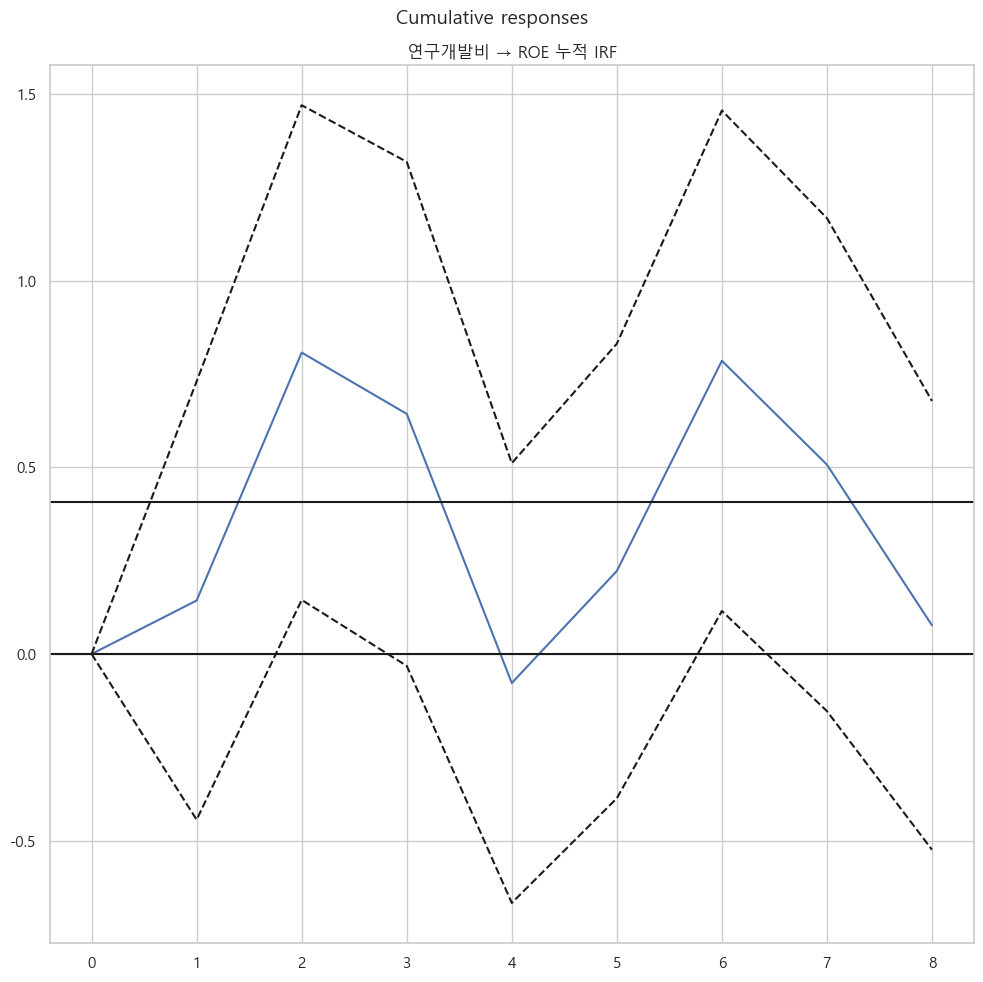

In [12]:
# 1) 충격반응분석 객체 생성 (horizon: 몇 기간까지 볼지)
horizon = 8   # 예: 8분기까지
irf = var_res.irf(horizon)

# 4) 누적 충격반응(cumulative IRF)도 가능
impulse_var  = '연구개발비'   # 충격을 줄 변수 이름
response_var = 'ROE' 

fig = irf.plot_cum_effects(impulse=impulse_var, response=response_var)
plt.title(f"{impulse_var} → {response_var} 누적 IRF")
plt.tight_layout()
plt.show()


In [13]:
df6 = df_diff1.drop(columns=['매출액'])
df6.columns

Index(['경제성장률(전기대비)', '수출', '연구개발비', '소비자심리지수', '실업률', 'ROE'], dtype='object')

In [14]:
# 1) VAR 모델 객체 생성
var_mod = VAR(df6)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res6 = var_mod.fit(
    maxlags=2,   # 또는 fit(0) 도 가능
    trend='c'    # 'c': constant, 'nc': no constant
)
target = 'ROE'

coef   = var_res6.params    [target]
stderr = var_res6.stderr    [target]
tstat  = var_res6.tvalues   [target]
pvalue = var_res6.pvalues   [target]

roe_eq = pd.concat([coef, stderr, tstat, pvalue], axis=1)
roe_eq.columns = ['coef', 'std_err', 't_stat', 'p_value']

print(roe_eq)

                        coef       std_err    t_stat   p_value
const          -3.274740e-01  4.282173e-01 -0.764738  0.444428
L1.경제성장률(전기대비)  1.153253e-01  7.419598e-02  1.554334  0.120105
L1.수출           2.650416e-01  3.222988e-01  0.822348  0.410879
L1.연구개발비        4.236853e-01  2.431534e-01  1.742461  0.081428
L1.소비자심리지수      3.475091e-07  3.742112e-07  0.928644  0.353073
L1.실업률          2.674678e-01  1.075217e-01  2.487569  0.012862
L1.ROE         -3.237864e-01  1.274087e-01 -2.541321  0.011043
L2.경제성장률(전기대비)  6.360255e-02  8.148124e-02  0.780579  0.435050
L2.수출           7.021199e-01  3.256045e-01  2.156358  0.031056
L2.연구개발비        6.194541e-01  2.227898e-01  2.780443  0.005428
L2.소비자심리지수     -9.343532e-07  3.258605e-07 -2.867341  0.004139
L2.실업률          1.244379e-01  1.007269e-01  1.235398  0.216682
L2.ROE         -1.773404e-01  1.362578e-01 -1.301507  0.193085


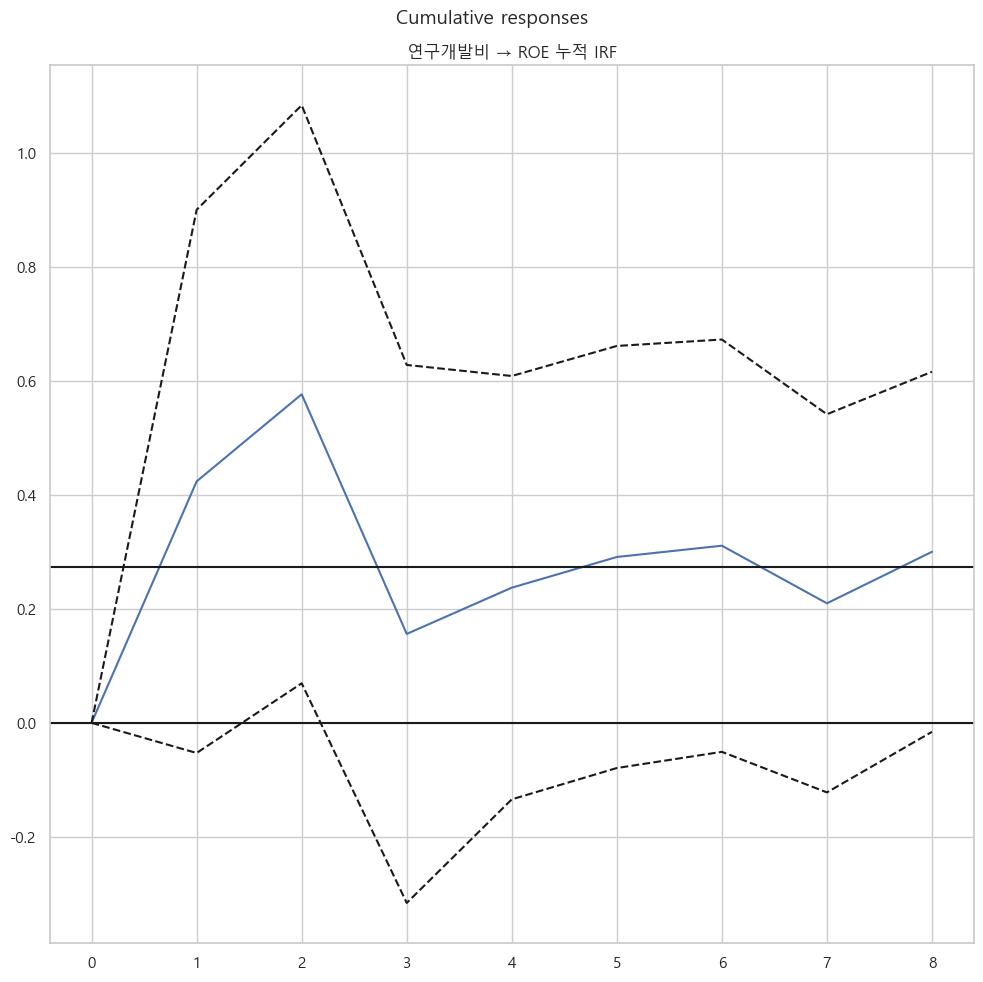

In [15]:
# 1) 충격반응분석 객체 생성 (horizon: 몇 기간까지 볼지)
horizon = 8   # 예: 8분기까지
irf6 = var_res6.irf(horizon)

# 4) 누적 충격반응(cumulative IRF)도 가능
impulse_var  = '연구개발비'   # 충격을 줄 변수 이름
response_var = 'ROE' 

fig = irf6.plot_cum_effects(impulse=impulse_var, response=response_var)
plt.title(f"{impulse_var} → {response_var} 누적 IRF")
plt.tight_layout()
plt.show()

In [16]:
df5 = df6.drop(columns=['경제성장률(전기대비)'])
df5.columns

Index(['수출', '연구개발비', '소비자심리지수', '실업률', 'ROE'], dtype='object')

In [17]:
# 1) VAR 모델 객체 생성
var_mod = VAR(df5)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res5 = var_mod.fit(
    maxlags=2,   # 또는 fit(0) 도 가능
    trend='c'    # 'c': constant, 'nc': no constant
)
target = 'ROE'

coef   = var_res5.params    [target]
stderr = var_res5.stderr    [target]
tstat  = var_res5.tvalues   [target]
pvalue = var_res5.pvalues   [target]

roe_eq = pd.concat([coef, stderr, tstat, pvalue], axis=1)
roe_eq.columns = ['coef', 'std_err', 't_stat', 'p_value']

print(roe_eq)

                    coef       std_err    t_stat   p_value
const       2.139067e-01  2.357266e-01  0.907435  0.364177
L1.수출       4.428145e-01  3.046895e-01  1.453330  0.146132
L1.연구개발비    4.320269e-01  2.394582e-01  1.804185  0.071202
L1.소비자심리지수  5.987113e-07  3.359641e-07  1.782069  0.074738
L1.실업률      2.622729e-01  1.078233e-01  2.432433  0.014998
L1.ROE     -2.599331e-01  1.204633e-01 -2.157777  0.030945
L2.수출       8.229529e-01  3.060727e-01  2.688750  0.007172
L2.연구개발비    6.415705e-01  2.238642e-01  2.865891  0.004158
L2.소비자심리지수 -9.090390e-07  3.255591e-07 -2.792240  0.005234
L2.실업률      1.260443e-01  1.000198e-01  1.260194  0.207599
L2.ROE     -1.424994e-01  1.303447e-01 -1.093250  0.274284


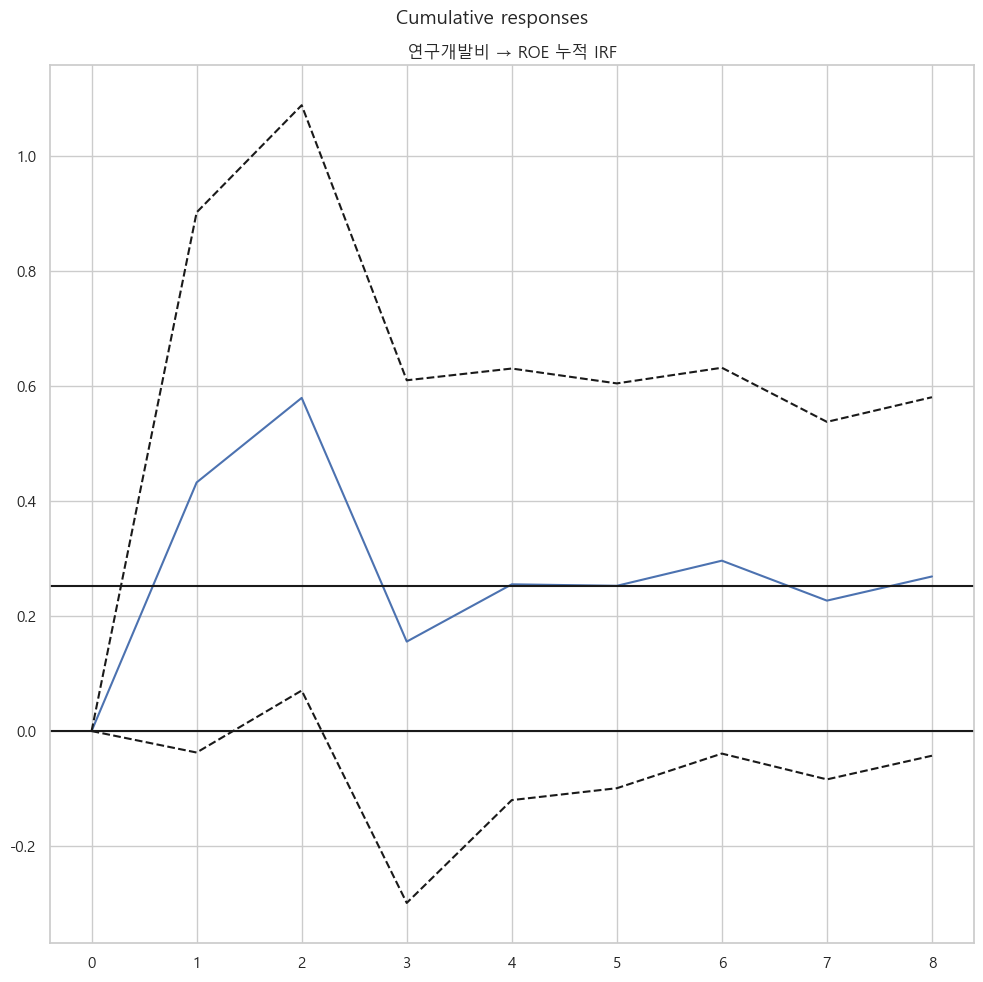

In [18]:
# 1) 충격반응분석 객체 생성 (horizon: 몇 기간까지 볼지)
horizon = 8   # 예: 8분기까지
irf5 = var_res5.irf(horizon)

# 4) 누적 충격반응(cumulative IRF)도 가능
impulse_var  = '연구개발비'   # 충격을 줄 변수 이름
response_var = 'ROE' 

fig = irf5.plot_cum_effects(impulse=impulse_var, response=response_var)
plt.title(f"{impulse_var} → {response_var} 누적 IRF")
plt.tight_layout()
plt.show()

In [19]:
df4 = df5.drop(columns=['실업률'])
df4.columns

Index(['수출', '연구개발비', '소비자심리지수', 'ROE'], dtype='object')

In [20]:
# 1) VAR 모델 객체 생성
var_mod4 = VAR(df4)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res4 = var_mod4.fit(
    maxlags=2,   # 또는 fit(0) 도 가능
    trend='c'    # 'c': constant, 'nc': no constant
)
target = 'ROE'

coef   = var_res4.params    [target]
stderr = var_res4.stderr    [target]
tstat  = var_res4.tvalues   [target]
pvalue = var_res4.pvalues   [target]

roe_eq = pd.concat([coef, stderr, tstat, pvalue], axis=1)
roe_eq.columns = ['coef', 'std_err', 't_stat', 'p_value']

print(roe_eq)

                    coef       std_err    t_stat   p_value
const       3.333134e-01  2.400687e-01  1.388408  0.165013
L1.수출       4.734468e-01  3.173779e-01  1.491745  0.135766
L1.연구개발비    2.082786e-01  2.324395e-01  0.896055  0.370223
L1.소비자심리지수  5.594223e-07  3.487229e-07  1.604203  0.108669
L1.ROE     -3.683112e-01  1.128123e-01 -3.264814  0.001095
L2.수출       8.799648e-01  3.176852e-01  2.769927  0.005607
L2.연구개발비    4.660008e-01  2.205318e-01  2.113077  0.034594
L2.소비자심리지수 -1.015461e-06  3.306019e-07 -3.071552  0.002129
L2.ROE     -2.767040e-01  1.197192e-01 -2.311275  0.020818


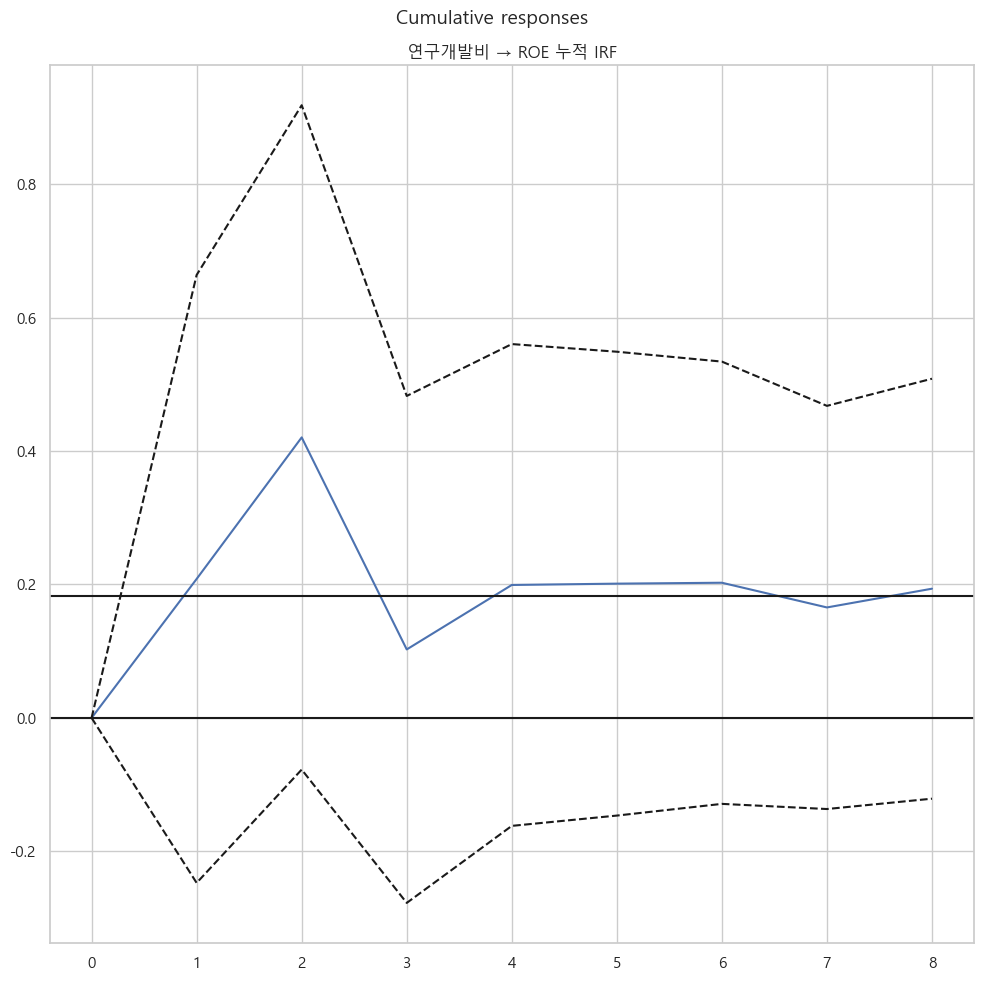

In [21]:
# 1) 충격반응분석 객체 생성 (horizon: 몇 기간까지 볼지)
horizon = 8   # 예: 8분기까지
irf4 = var_res4.irf(horizon)

# 4) 누적 충격반응(cumulative IRF)도 가능
impulse_var  = '연구개발비'   # 충격을 줄 변수 이름
response_var = 'ROE' 

fig = irf4.plot_cum_effects(impulse=impulse_var, response=response_var)
plt.title(f"{impulse_var} → {response_var} 누적 IRF")
plt.tight_layout()
plt.show()

In [22]:
df3 = df4.drop(columns=['수출'])
df3.columns

Index(['연구개발비', '소비자심리지수', 'ROE'], dtype='object')

In [23]:
# 1) VAR 모델 객체 생성
var_mod3 = VAR(df3)

# 2) lag 0으로 적합
#    trend='c' → 상수항 포함, 필요 없으면 'n'
var_res3 = var_mod3.fit(
    maxlags=2,   # 또는 fit(0) 도 가능
    trend='c'    # 'c': constant, 'nc': no constant
)
target = 'ROE'

coef   = var_res3.params    [target]
stderr = var_res3.stderr    [target]
tstat  = var_res3.tvalues   [target]
pvalue = var_res3.pvalues   [target]

roe_eq = pd.concat([coef, stderr, tstat, pvalue], axis=1)
roe_eq.columns = ['coef', 'std_err', 't_stat', 'p_value']

print(roe_eq)

                    coef       std_err    t_stat   p_value
const       3.420481e-01  2.551272e-01  1.340696  0.180019
L1.연구개발비    2.945343e-01  2.249325e-01  1.309434  0.190387
L1.소비자심리지수  6.015780e-07  3.705398e-07  1.623518  0.104479
L1.ROE     -3.413022e-01  1.195249e-01 -2.855491  0.004297
L2.연구개발비    6.922519e-01  2.169954e-01  3.190169  0.001422
L2.소비자심리지수 -1.051817e-06  3.508912e-07 -2.997559  0.002722
L2.ROE     -2.553238e-01  1.267433e-01 -2.014495  0.043958


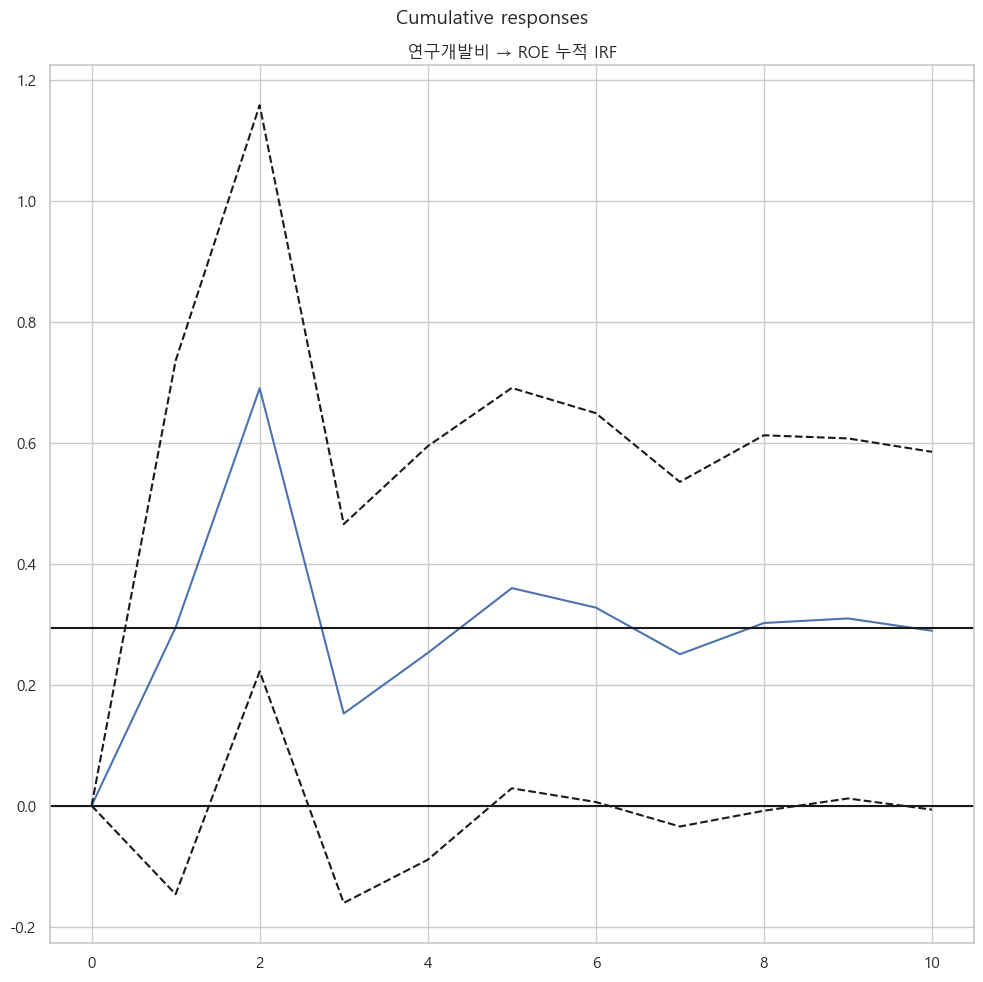

In [63]:
# 1) 충격반응분석 객체 생성 (horizon: 몇 기간까지 볼지)
horizon = 10   # 예: 8분기까지
irf3 = var_res3.irf(horizon)

# 4) 누적 충격반응(cumulative IRF)도 가능
impulse_var  = '연구개발비'   # 충격을 줄 변수 이름
response_var = 'ROE' 

fig = irf3.plot_cum_effects(impulse=impulse_var, response=response_var)
plt.title(f"{impulse_var} → {response_var} 누적 IRF")
plt.tight_layout()
plt.show()

FEVD for 연구개발비
        연구개발비   소비자심리지수       ROE
0    1.000000  0.000000  0.000000
1    0.933976  0.013833  0.052191
2    0.846783  0.019444  0.133772
3    0.824541  0.028667  0.146792
4    0.822445  0.032535  0.145020
5    0.823869  0.032264  0.143868
6    0.822564  0.032979  0.144456
7    0.821833  0.032948  0.145219

FEVD for 소비자심리지수
        연구개발비   소비자심리지수       ROE
0    0.010286  0.989714  0.000000
1    0.013415  0.979487  0.007098
2    0.015783  0.974737  0.009479
3    0.015546  0.974917  0.009536
4    0.015420  0.974593  0.009987
5    0.015404  0.974511  0.010086
6    0.015570  0.974358  0.010072
7    0.015567  0.974358  0.010075

FEVD for ROE
        연구개발비   소비자심리지수       ROE
0    0.000079  0.024417  0.975505
1    0.021579  0.049785  0.928637
2    0.072611  0.145264  0.782125
3    0.131112  0.144622  0.724266
4    0.131130  0.146693  0.722177
5    0.132540  0.145373  0.722087
6    0.132139  0.148448  0.719413
7    0.133291  0.148204  0.718505


None


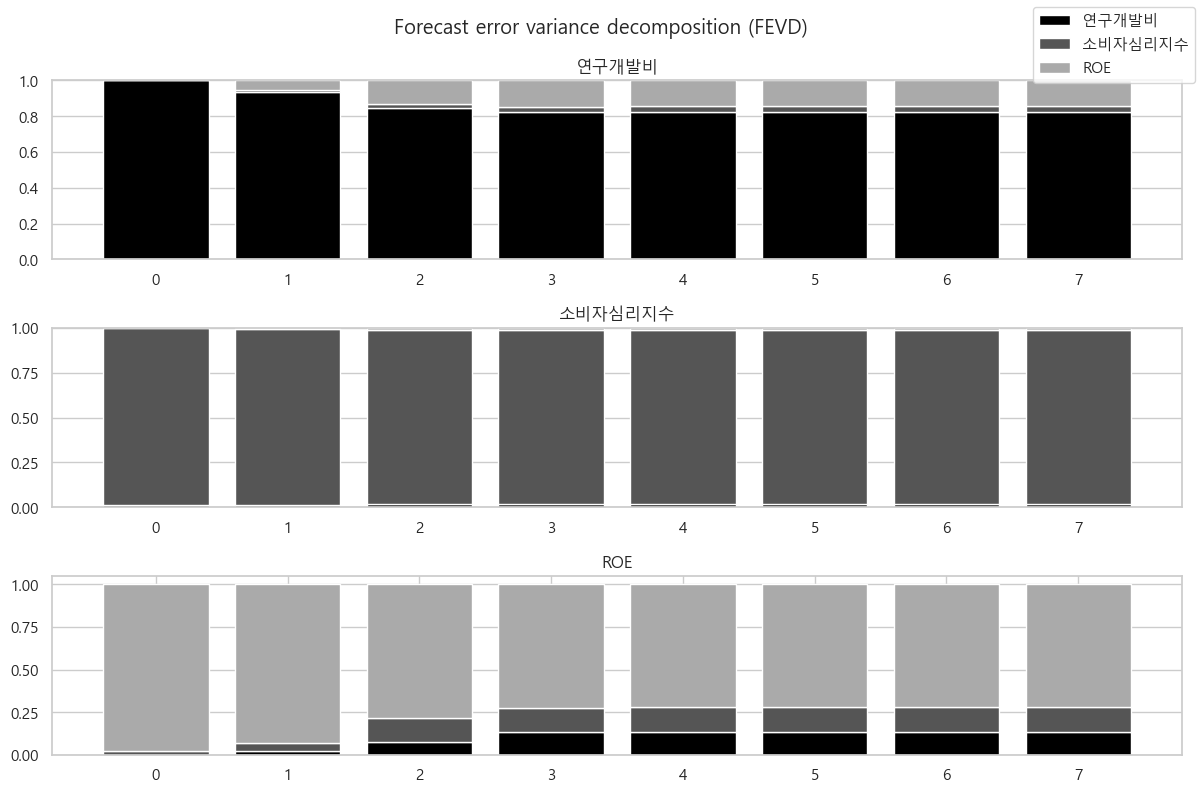

In [60]:
# horizon까지 FEVD 계산
horizon = 8  
fevd3 = var_res3.fevd(horizon)

# 1) 요약 테이블 출력
print(fevd3.summary())

# 2) 분해된 배열 가져오기
# fevd3.decomp.shape = (horizon+1, neqs, neqs)
#   - 첫번째 축: 시점(0 ~ horizon)
#   - 두번째 축: 예측대상 변수 인덱스
#   - 세번째 축: 충격변수 인덱스
decomp = fevd3.decomp   

# 예: horizon=1(1분기 뒤)에 ROE 예측오차분산 중 ‘연구개발비’ 충격 기여도
# decomp[1, df3.columns.get_loc('ROE'), df3.columns.get_loc('연구개발비')]

# 3) 그래프 그리기
fig = fevd3.plot(figsize=(12,8))   # 각 변수별로 시점별 기여도 시각화
plt.tight_layout()
plt.show()


In [ ]:
# df_diff1은 이미 1차 차분이 적용된 모든 변수를 포함합니다.
# 인덱스를 PeriodIndex로 변환하여 VAR 모델에 적합한 형태로 만듭니다.
df_var_final = df_diff1.copy()

# 현재 df_var_final의 인덱스가 날짜/분기 형태인지 확인하고 PeriodIndex로 변환
# 원본 dataset의 인덱스를 기준으로 PeriodIndex 생성 시도
# df_diff1이 .iloc[1:]로 인해 첫 행이 제거되었으므로, 인덱스도 그에 맞춰 조정
try:
    original_index_after_diff = dataset.index[1:] # 원본 인덱스의 두 번째부터 사용
    df_var_final.index = pd.PeriodIndex(
        original_index_after_diff.astype(str), freq='Q'
    )
except Exception as e:
    print(f"PeriodIndex 변환 오류: {e}. 인덱스 형식을 확인하세요.")
    print("수동으로 인덱스를 설정해야 할 수도 있습니다 (예: pd.PeriodIndex(start='2010Q2', freq='Q', periods=len(df_var_final)))")

print("\n=== VAR 모델링에 사용될 최종 데이터셋 헤드 (모든 변수 포함) ===")
print(df_var_final.head())
print(f"최종 데이터셋 변수 개수: {len(df_var_final.columns)}")
print("-" * 50)

In [ ]:
df_var_final.columns

In [ ]:
# 2. 새로운 선택된 변수들로 데이터셋 필터링 (제안된 5개 변수)
selected_variables_new = ['경제성장률(전기대비)', '소비자물가총지수','매출액', '수출', '내수', '연구개발비', '소비자심리지수', '실업률',
       '가동률지수', '환율', '기준금리', 'ROE']
print(f"새롭게 선택된 변수: {selected_variables_new}")

In [ ]:
 # --- 3. 최적 시차(Lag Length) 결정 (5개 변수 기반) ---
    # 변수 개수가 늘어났으므로 maxlags를 다시 8이나 10으로 설정 (이전과 동일하게 10으로 유지)

df_var_5_vars = df_var_final[selected_variables_new].copy()
df_var_5_vars.index = pd.PeriodIndex(df_var_5_vars.index, freq='Q')

model_for_lag_selection_5_vars = VAR(df_var_5_vars)

print("\n최적 시차 탐색 중 (최대 10차 시차까지) ...")
# AIC, BIC 등 정보 기준을 사용하여 최적 시차를 선택합니다.
# verbose=True로 설정하여 각 시차별 결과 상세 보기 가능 (출력이 길어질 수 있음)
lag_order_results_5_vars = model_for_lag_selection_5_vars.select_order(maxlags=2) # maxlags를 10으로 유지

print("\n=== 5개 변수 기반 최적 시차 결정 결과 (lag_order_results_5_vars.summary()) ===")
print(lag_order_results_5_vars.summary())
print("-" * 50)

In [ ]:
 # --- 4. VAR 모델 적합 (5개 변수 및 새로운 최적 시차 기반) ---
# AIC 기준의 최적 시차를 추출합니다.
optimal_lag_5_vars = 7

print(f"\n선택된 최적 시차 (AIC 기준, 5개 변수): {optimal_lag_5_vars}차")

var_mod_5_vars = VAR(df_var_5_vars)
# 최적 시차로 모델을 적합하고 상수항(trend='c')을 포함합니다.
var_res_5_vars = var_mod_5_vars.fit(
    maxlags=optimal_lag_5_vars,
    trend='c'
)

print("\n=== VAR 모델 적합 결과 (var_res_5_vars.summary()) ===")
print(var_res_5_vars.summary())
print("-" * 50)

In [ ]:
 # --- 5. 그랜저 인과관계 테스트 (5개 변수 기반) ---
print("\n=== 선택된 5개 변수 간 쌍별 그랜저 인과관계 테스트 시작 ===")
print(f"테스트에 사용된 시차: {optimal_lag_5_vars}차")
from statsmodels.tsa.stattools import grangercausalitytests

granger_results_pairwise_5_vars = {}
# 모든 변수 쌍에 대해 그랜저 인과관계 테스트 수행
# 귀무가설 (H0): 'causing_var'는 'resulting_var'를 그랜저 인과하지 않는다.
# grangercausalitytests 함수는 (y, x) 순서로 배열을 기대합니다.
for causing_var in selected_variables_new:
    for resulting_var in selected_variables_new:
        if causing_var == resulting_var:
            continue

        pair_name = f"{causing_var} -> {resulting_var}"
        print(f"\n--- {pair_name} 그랜저 인과관계 테스트 ---")

        # 그랜저 인과관계 테스트를 위해 [결과 변수, 원인 변수] 순서로 데이터 준비
        data_for_test = df_var_5_vars[[resulting_var, causing_var]]

        try:
            # verbose=False로 설정하여 각 쌍에 대한 상세 출력은 생략하고 요약만 확인
            test_output = grangercausalitytests(data_for_test, maxlag=optimal_lag_5_vars)
            # 최적 시차에서의 F-test p-value 추출 (딕셔너리 구조에 따라 접근)
            p_value = test_output[optimal_lag_5_vars][0]['ssr_ftest'][1]

            granger_results_pairwise_5_vars[pair_name] = {
                'pvalue': p_value,
                'reject_null': p_value < 0.05
            }
        except Exception as e:
            print(f"'{pair_name}' 테스트 중 오류 발생: {e}")
            granger_results_pairwise_5_vars[pair_name] = {
                'pvalue': None,
                'reject_null': False
            }

print("\n=== 쌍별 그랜저 인과관계 테스트 최종 요약 (p-value 기준, 5개 변수) ===")
print("------------------------------------------------------------------------------------------------")
print("  원인 변수      ->    결과 변수     | p-value  |  해석 (5% 유의수준)")
print("------------------------------------------------------------------------------------------------")
for pair, res in granger_results_pairwise_5_vars.items():
    # "원인 -> 결과" 형태의 key를 화살표 기준으로 분리
    causing, resulting = [x.strip() for x in pair.split("->")]
    if resulting == "ROE":
        if res['pvalue'] is not None:
            interp = "인과관계 존재" if res['reject_null'] else "인과관계 없음"
            print(f"{causing.ljust(15)} -> {resulting.ljust(10)} | {res['pvalue']:.4f}   | {interp}")
        else:
            print(f"{causing.ljust(15)} -> {resulting.ljust(10)} | 오류     | 테스트 불가")
print("----------------------------------------------------")
print("\n**참고:**")
print("  - p-value가 0.05보다 작으면 해당 원인 변수가 결과 변수를 그랜저 인과한다고 해석합니다.")
print("  - 이는 원인 변수의 과거 값이 결과 변수의 미래 값을 예측하는 데 유용한 정보를 제공한다는 의미입니다.")